# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [111]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')



In [107]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [114]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
#from google.colab import drive
# drive.mount('/content/drive')

In [118]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Set working directory and file list
data_dir = '/Users/sitoshnabhoi/Certifications/IIITB/EDA/Starter Notebook - EDA NYC Taxi/trip_records'
file_list = os.listdir(data_dir)

# DataFrame to collect all samples
all_sampled_data = pd.DataFrame()

# Loop through each file
for file_name in file_list:
    file_path = os.path.join(data_dir, file_name)

    try:
        print(f"Reading: {file_name}")

        # Use correct reader based on file extension
        if file_name.endswith('.csv'):
            df = pd.read_csv(file_path, encoding='utf-8', low_memory=False)
        elif file_name.endswith('.parquet'):
            df = pd.read_parquet(file_path)
        else:
            #print(f"Skipping unsupported file: {file_name}")
            continue

        # Check required column
        if 'tpep_pickup_datetime' not in df.columns:
            print(f"'tpep_pickup_datetime' not in {file_name}. Skipping.")
            continue

        # Convert datetime and extract hour info
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
        df.dropna(subset=['tpep_pickup_datetime'], inplace=True)
        df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
        df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

        # Sample 5% per date-hour
        sampled = df.groupby(['pickup_date', 'pickup_hour'], group_keys=False).apply(
            lambda x: x.sample(frac=0.05, random_state=42) if len(x) >= 20 else x
        )

        # Append to main DataFrame
        all_sampled_data = pd.concat([all_sampled_data, sampled], ignore_index=True)

    except Exception as e:
        print(f" Error processing {file_name}: {e}")

# Limit to max 300,000 records
max_records = 300000
if len(all_sampled_data) > max_records:
    all_sampled_data = all_sampled_data.sample(n=max_records, random_state=42)

# Save the final dataset
output_csv = os.path.join(data_dir, 'yearly_sampled_data.csv')
output_parquet = os.path.join(data_dir, 'yearly_sampled_data.parquet')

if not all_sampled_data.empty:
    all_sampled_data.to_csv(output_csv, index=False)
    all_sampled_data.to_parquet(output_parquet, index=False)
    print(f"\n Saved {len(all_sampled_data)} rows to:")
    print(f"  CSV:     {output_csv}")
    print(f"  Parquet: {output_parquet}")
else:
    print("\n No data was sampled.")




Reading: 2023-12.parquet
Reading: 2023-6.parquet
Reading: 2023-7.parquet
Reading: .DS_Store
Reading: 2023-5.parquet
Reading: EDA_Assg_NYC_Taxi_Starter.ipynb
Reading: 2023-11.parquet
Reading: 2023-10.parquet
Reading: 2023-4.parquet
Reading: 2023-1.parquet
Reading: 2023-8.parquet
Reading: 2023-9.parquet
Reading: .ipynb_checkpoints
Reading: 2023-2.parquet
Reading: 2023-3.parquet

 Saved 300000 rows to:
  CSV:     /Users/sitoshnabhoi/Certifications/IIITB/EDA/Starter Notebook - EDA NYC Taxi/trip_records/yearly_sampled_data.csv
  Parquet: /Users/sitoshnabhoi/Certifications/IIITB/EDA/Starter Notebook - EDA NYC Taxi/trip_records/yearly_sampled_data.parquet


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [120]:
# Store the df in csv/parquet
output_csv = os.path.join(data_dir, 'yearly_sampled_data.csv')
output_parquet = os.path.join(data_dir, 'yearly_sampled_data.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [122]:
# Load the new data file
df=pd.read_csv('/Users/sitoshnabhoi/Certifications/IIITB/EDA/Starter Notebook - EDA NYC Taxi/trip_records/yearly_sampled_data.csv')


In [123]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-02-14 09:34:34   2023-02-14 09:52:19              1.0   
1         2  2023-05-11 16:34:31   2023-05-11 16:56:14              1.0   
2         2  2023-06-04 00:37:44   2023-06-04 00:45:30              1.0   
3         2  2023-06-15 02:45:01   2023-06-15 02:52:01              1.0   
4         2  2023-03-01 20:55:34   2023-03-01 21:09:09              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.11         1.0                  N           186           230   
1           2.43         1.0                  N           237           234   
2           0.88         1.0                  N           264           264   
3           1.09         1.0                  N            79           211   
4           1.94         NaN                NaN           158           144   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        3.92           0.0   
1             1  ...      0.5        3.94           0.0   
2             2  ...      0.5        0.00           0.0   
3             1  ...      0.5        2.86           0.0   
4             0  ...      0.5        3.46           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         23.52                   2.5          0.0   
1                    1.0         30.24                   2.5          0.0   
2                    1.0         13.60                   2.5          0.0   
3                    1.0         17.16                   2.5          0.0   
4                    1.0         20.78                   NaN          NaN   

   pickup_date  pickup_hour airport_fee  
0   2023-02-14            9         NaN  
1   2023-05-11           16         NaN  
2   2023-06-04            0         NaN  
3   2023-06-15            2         NaN  
4   2023-03-01           20         NaN  

[5 rows x 22 columns]

In [126]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               300000 non-null  int64  
 1   tpep_pickup_datetime   300000 non-null  object 
 2   tpep_dropoff_datetime  300000 non-null  object 
 3   passenger_count        289714 non-null  float64
 4   trip_distance          300000 non-null  float64
 5   RatecodeID             289714 non-null  float64
 6   store_and_fwd_flag     289714 non-null  object 
 7   PULocationID           300000 non-null  int64  
 8   DOLocationID           300000 non-null  int64  
 9   payment_type           300000 non-null  int64  
 10  fare_amount            300000 non-null  float64
 11  extra                  300000 non-null  float64
 12  mta_tax                300000 non-null  float64
 13  tip_amount             300000 non-null  float64
 14  tolls_amount           300000 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [130]:
# Fix the index and drop any columns that are not needed
columns_to_drop = ['pickup_date', 'pickup_hour','store_and_fwd_flag']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
df.reset_index(drop=True, inplace=True)
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-02-14 09:34:34   2023-02-14 09:52:19              1.0   
1         2  2023-05-11 16:34:31   2023-05-11 16:56:14              1.0   
2         2  2023-06-04 00:37:44   2023-06-04 00:45:30              1.0   
3         2  2023-06-15 02:45:01   2023-06-15 02:52:01              1.0   
4         2  2023-03-01 20:55:34   2023-03-01 21:09:09              NaN   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.11         1.0           186           230             1   
1           2.43         1.0           237           234             1   
2           0.88         1.0           264           264             2   
3           1.09         1.0            79           211             1   
4           1.94         NaN           158           144             0   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0        15.60    0.0      0.5        3.92           0.0   
1        19.80    2.5      0.5        3.94           0.0   
2         8.60    1.0      0.5        0.00           0.0   
3         9.30    1.0      0.5        2.86           0.0   
4        13.32    0.0      0.5        3.46           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         23.52                   2.5          0.0   
1                    1.0         30.24                   2.5          0.0   
2                    1.0         13.60                   2.5          0.0   
3                    1.0         17.16                   2.5          0.0   
4                    1.0         20.78                   NaN          NaN   

   airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [133]:
# Combine the two airport fee columns

# Identify duplicate-like fee columns
fee_cols = [col for col in df.columns if col.lower() == 'airport_fee']

if len(fee_cols) > 1:
    print(f"Found multiple airport fee columns: {fee_cols}")

    # Prefer non-null values if they differ
    df['airport_fee_combined'] = df[fee_cols].bfill(axis=1).iloc[:, 0]

    # Drop the original fee columns
    df.drop(columns=fee_cols, inplace=True)

    # Rename the combined column to 'airport_fee'
    df.rename(columns={'airport_fee_combined': 'airport_fee'}, inplace=True)

    print("Combined multiple 'airport_fee' columns into one.")
else:
    print("Only one 'airport_fee' column found — no merge needed.")

df.head()

Found multiple airport fee columns: ['Airport_fee', 'airport_fee']
Combined multiple 'airport_fee' columns into one.


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-02-14 09:34:34   2023-02-14 09:52:19              1.0   
1         2  2023-05-11 16:34:31   2023-05-11 16:56:14              1.0   
2         2  2023-06-04 00:37:44   2023-06-04 00:45:30              1.0   
3         2  2023-06-15 02:45:01   2023-06-15 02:52:01              1.0   
4         2  2023-03-01 20:55:34   2023-03-01 21:09:09              NaN   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.11         1.0           186           230             1   
1           2.43         1.0           237           234             1   
2           0.88         1.0           264           264             2   
3           1.09         1.0            79           211             1   
4           1.94         NaN           158           144             0   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0        15.60    0.0      0.5        3.92           0.0   
1        19.80    2.5      0.5        3.94           0.0   
2         8.60    1.0      0.5        0.00           0.0   
3         9.30    1.0      0.5        2.86           0.0   
4        13.32    0.0      0.5        3.46           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         23.52                   2.5          0.0  
1                    1.0         30.24                   2.5          0.0  
2                    1.0         13.60                   2.5          0.0  
3                    1.0         17.16                   2.5          0.0  
4                    1.0         20.78                   NaN          NaN

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [136]:
# check where values of fare amount are negative

negative_fares = df[df['fare_amount'] < 0]

# 2. Check how many rows match
print(f"Total rows with negative fare_amount: {len(negative_fares)}")


Total rows with negative fare_amount: 0


Did you notice something different in the `RatecodeID` column for above records?

In [139]:
# Analyse RatecodeID for the negative fare amounts

ratecode_counts = negative_fares['RatecodeID'].value_counts(dropna=False).sort_index()
print("\nRatecodeID distribution for negative fare amounts:")
print(ratecode_counts)


RatecodeID distribution for negative fare amounts:
Series([], Name: count, dtype: int64)


In [141]:
# Find which columns have negative values

monetary_columns = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount',
    'tolls_amount', 'improvement_surcharge', 'total_amount',
    'congestion_surcharge', 'airport_fee'
]

for col in monetary_columns:
    if col in df.columns:
        negative_count = (df[col] < 0).sum()
        if negative_count > 0:
            print(f"{negative_count} negative values in '{col}'")
        


15 negative values in 'mta_tax'
15 negative values in 'improvement_surcharge'
15 negative values in 'total_amount'
12 negative values in 'congestion_surcharge'
3 negative values in 'airport_fee'


In [143]:
# fix these negative values
for col in monetary_columns:
    if col in df.columns:
        negative_count = (df[col] < 0).sum()
        if negative_count > 0:
            print(f"Fixing {negative_count} negative values in '{col}'")
            all_sampled_data[col] = all_sampled_data[col].apply(lambda x: x if x >= 0 else 0)


Fixing 15 negative values in 'mta_tax'
Fixing 15 negative values in 'improvement_surcharge'
Fixing 15 negative values in 'total_amount'
Fixing 12 negative values in 'congestion_surcharge'
Fixing 3 negative values in 'airport_fee'


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [147]:
# Find the proportion of missing values in each column

missing_proportions = df.isnull().mean().sort_values(ascending=False)

# Display results
print("Proportion of missing values in each column:")
print(missing_proportions)

Proportion of missing values in each column:
airport_fee              0.034287
congestion_surcharge     0.034287
passenger_count          0.034287
RatecodeID               0.034287
extra                    0.000000
total_amount             0.000000
improvement_surcharge    0.000000
tolls_amount             0.000000
tip_amount               0.000000
mta_tax                  0.000000
VendorID                 0.000000
tpep_pickup_datetime     0.000000
payment_type             0.000000
DOLocationID             0.000000
PULocationID             0.000000
trip_distance            0.000000
tpep_dropoff_datetime    0.000000
fare_amount              0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [150]:
# Display the rows with null values
missing_count = df['passenger_count'].isnull().sum()
print(f"Missing values in 'passenger_count': {missing_count}") 

# Impute NaN values in 'passenger_count'
mode_value = df['passenger_count'].mode().iloc[0]
df['passenger_count'].fillna(mode_value, inplace=True)
print(f"Missing values in 'passenger_count' after imputation: {df['passenger_count'].isnull().sum()}")

Missing values in 'passenger_count': 10286
Missing values in 'passenger_count' after imputation: 0


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [154]:
# Fix missing values in 'RatecodeID'
ratecode_mode = df['RatecodeID'].mode().iloc[0]
df['RatecodeID'].fillna(ratecode_mode, inplace=True)
print(f"Missing values in 'RatecodeID' after imputation: {df['RatecodeID'].isnull().sum()}")

Missing values in 'RatecodeID' after imputation: 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [157]:
# handle null values in congestion_surcharge

surcharge_mode = df['congestion_surcharge'].mode().iloc[0]
df['congestion_surcharge'].fillna(surcharge_mode, inplace=True)
print(f"Missing values in 'congestion_surcharge' after imputation: {df['congestion_surcharge'].isnull().sum()}")


Missing values in 'congestion_surcharge' after imputation: 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [160]:
# Handle any remaining missing values
airport_fee_mode = df['airport_fee'].mode().iloc[0]
df['airport_fee'].fillna(airport_fee_mode, inplace=True)

# Check if imputation worked
print(f"Missing values in 'airport_fee' after imputation: {df['airport_fee'].isnull().sum()}")


Missing values in 'airport_fee' after imputation: 0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [164]:
# Describe the data and check if there are any potential outliers present
print(df.describe())

            VendorID  passenger_count  trip_distance     RatecodeID  \
count  300000.000000    300000.000000  300000.000000  300000.000000   
mean        1.732807         1.357253       3.666222       1.631507   
std         0.447514         0.881135      68.337815       7.382565   
min         1.000000         0.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.800000       1.000000   
75%         2.000000         1.000000       3.420000       1.000000   
max         6.000000         9.000000   27586.370000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean      165.316977     164.217727       1.163283      19.921031   
std        63.997764      69.834566       0.508045      18.457350   
min         1.000000       1.000000       0.000000       0.000000   
25%       132.0

In [166]:

# Check for potential out of place values in various columns
#passenger_count
print('passenger_count\n')
print("Unique passenger counts:", df['passenger_count'].unique())
print(df[df['passenger_count'] > 6])  # More than 6 is rare in typical taxis

#fare_amount
print('fare_amount\n')
print(df[df['fare_amount'] <= 0].shape)  # Negative or zero fare
print(df[df['fare_amount'] > 200])       # Check unusually high fares

#trip_distance
print('trip_distance\n')
print(df[df['trip_distance'] == 0].shape)   # No movement
print(df[df['trip_distance'] > 250])         # Very long rides

#total_amount
print('total_amount\n')
print(df[df['total_amount'] < 0])           # Negative total (possibly data errors)
print(df[df['total_amount'] > 300])         # Outliers    

#RatecodeID
print('RatecodeID\n')
print("Unique RatecodeID values:", df['RatecodeID'].unique()) #outliers

passenger_count

Unique passenger counts: [1. 4. 2. 3. 0. 6. 5. 8. 9.]
        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
57510          2  2023-11-30 00:13:36   2023-11-30 00:13:39              8.0   
193429         2  2023-12-20 19:26:27   2023-12-20 19:33:17              9.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
57510            0.00         5.0            90           264             1   
193429           0.07         5.0           112           112             2   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
57510          86.0    0.0      0.5         5.0           0.0   
193429         92.0    0.0      0.5         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
57510                     1.0          92.5                   0.0          0.0  
193429                    1.0          93.5                   0.0          0.0  
fare_amount

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [171]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]
print("Unique passenger counts after filtering:", df['passenger_count'].unique())


Unique passenger counts after filtering: [1. 4. 2. 3. 0. 6. 5.]


In [173]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-02-14 09:34:34   2023-02-14 09:52:19              1.0   
1         2  2023-05-11 16:34:31   2023-05-11 16:56:14              1.0   
2         2  2023-06-04 00:37:44   2023-06-04 00:45:30              1.0   
3         2  2023-06-15 02:45:01   2023-06-15 02:52:01              1.0   
4         2  2023-03-01 20:55:34   2023-03-01 21:09:09              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.11         1.0           186           230             1   
1           2.43         1.0           237           234             1   
2           0.88         1.0           264           264             2   
3           1.09         1.0            79           211             1   
4           1.94         1.0           158           144             0   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0        15.60    0.0      0.5        3.92           0.0   
1        19.80    2.5      0.5        3.94           0.0   
2         8.60    1.0      0.5        0.00           0.0   
3         9.30    1.0      0.5        2.86           0.0   
4        13.32    0.0      0.5        3.46           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         23.52                   2.5          0.0  
1                    1.0         30.24                   2.5          0.0  
2                    1.0         13.60                   2.5          0.0  
3                    1.0         17.16                   2.5          0.0  
4                    1.0         20.78                   2.5          0.0

In [175]:
# Continue with outlier handling
#Entries where trip_distance is nearly 0 and fare_amount is more than 300
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

#Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) )]

#Entries where trip_distance is more than 250 miles.
df['trip_distance'] = df['trip_distance'].apply(lambda x: min(x, 50) if x > 250 else x)

#Entries where payment_type is 0
df['payment_type'].replace(0, df['payment_type'].mode().iloc[0], inplace=True)

In [177]:
#Do any columns need standardising?
#Yes — standardizing columns can help normalize the scale of numerical values, 
#especially to perform:clustering (e.g., K-means),dimensionality reduction (e.g., PCA), 
#or machine learning (regression, classification).

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [180]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

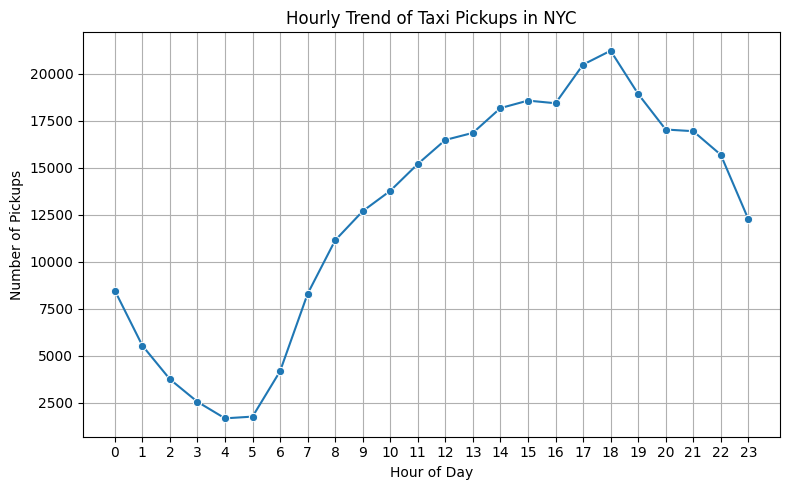

In [186]:
# Find and show the hourly trends in taxi pickups
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract hour
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Group by hour
hourly_counts = df.groupby('pickup_hour').size().reset_index(name='num_pickups')

# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=hourly_counts, x='pickup_hour', y='num_pickups', marker='o')
plt.title('Hourly Trend of Taxi Pickups in NYC')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


In [187]:
# Find and show the daily trends in taxi pickups (days of the week)

# Extract day of week (0 = Monday, 6 = Sunday)
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek

# Optional: Map to names for readability
day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['pickup_day_name'] = df['pickup_day'].map(day_map)

# Group and count
daily_counts = df['pickup_day_name'].value_counts().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=daily_counts.index, y=daily_counts.values, palette="viridis")
plt.title('Daily Taxi Pickup Trends (by Day of the Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.tight_layout()
plt.show()

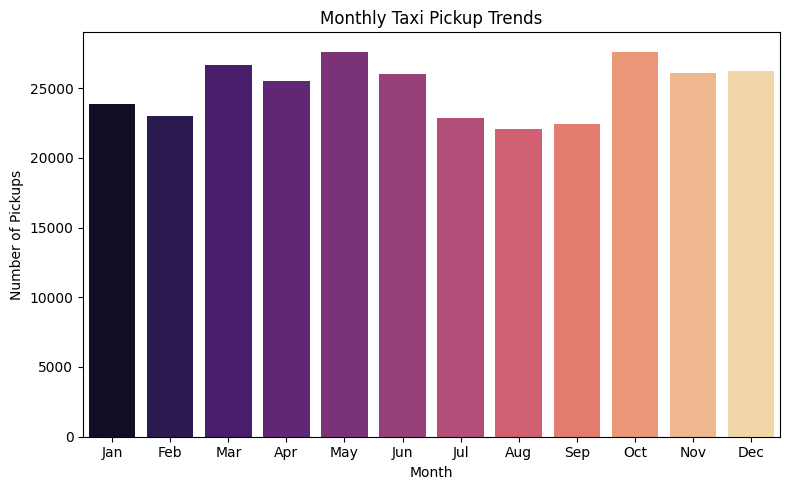

In [190]:
# Show the monthly trends in pickups

# Extract month (as number and name)
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df['pickup_month_name'] = df['pickup_month'].map(month_map)

# Group and count
monthly_counts = df['pickup_month_name'].value_counts().reindex(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette="magma")
plt.title('Monthly Taxi Pickup Trends')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.tight_layout()
plt.show()



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [194]:
# Analyse the above parameters
# List of columns to check
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Loop through each column and print counts of zero and negative values
for col in columns_to_check:
    num_negative = (df[col] < 0).sum()
    num_zero = (df[col] == 0).sum()
    print(f"{col} - Negative values: {num_negative}, Zero values: {num_zero}")



fare_amount - Negative values: 0, Zero values: 49
tip_amount - Negative values: 0, Zero values: 68878
total_amount - Negative values: 11, Zero values: 12
trip_distance - Negative values: 0, Zero values: 6060


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [198]:
# Create a df with non zero entries for the selected parameters.

# Filter out rows where any of the selected columns are zero
df_nonzero = df[(df[columns_to_check] != 0).all(axis=1)]

# Display result summary
print(f"Original rows: {len(df)}")
print(f"Rows after removing zero entries: {len(df_nonzero)}")

Original rows: 299948
Rows after removing zero entries: 229575


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

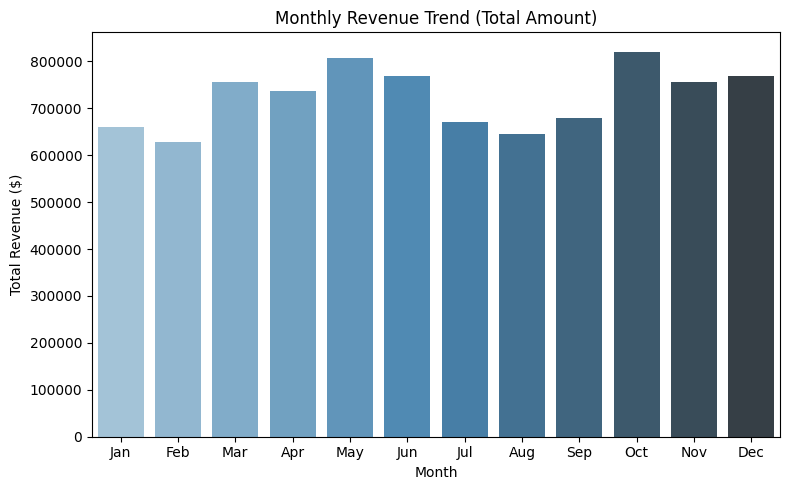

In [201]:
# Group data by month and analyse monthly revenue

# Extract month
df['month'] = df['tpep_pickup_datetime'].dt.month
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df['month_name'] = df['month'].map(month_map)

# Calculate total revenue per month
monthly_revenue = df.groupby('month_name')['total_amount'].sum().reindex(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette='Blues_d')
plt.title('Monthly Revenue Trend (Total Amount)')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.tight_layout()
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

Revenue Proportion by Quarter (%):
quarter
1    23.521626
2    26.596397
3    22.921750
4    26.960227
Name: total_amount, dtype: float64


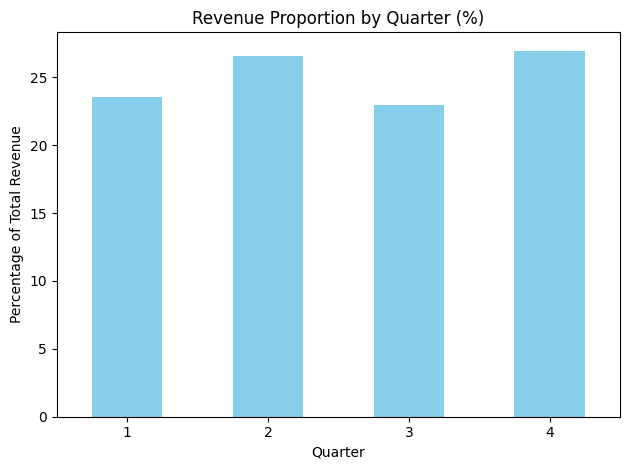

In [204]:
# Calculate proportion of each quarter
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract the quarter
df['quarter'] = df['tpep_pickup_datetime'].dt.quarter

# Group by quarter and calculate total revenue
quarterly_revenue = df.groupby('quarter')['total_amount'].sum()

# Calculate the proportion of each quarter
quarterly_proportion = (quarterly_revenue / quarterly_revenue.sum()) * 100

# Display results
print("Revenue Proportion by Quarter (%):")
print(quarterly_proportion.sort_index())


quarterly_proportion.plot(kind='bar', color='skyblue', title='Revenue Proportion by Quarter (%)')
plt.ylabel('Percentage of Total Revenue')
plt.xlabel('Quarter')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

Quarterly Revenue Proportions (%):
quarter
2001Q1     0.00
2003Q1     0.00
2008Q4     0.00
2009Q1     0.00
2022Q4     0.00
2023Q1    23.52
2023Q2    26.60
2023Q3    22.92
2023Q4    26.95
Name: total_amount, dtype: float64


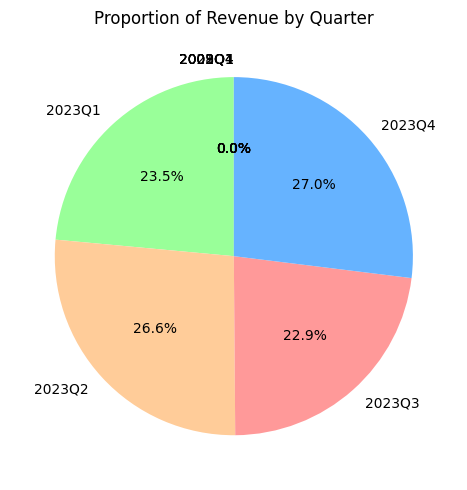

In [207]:
# Show how trip fare is affected by distance


# Extract quarter
df['quarter'] = df['tpep_pickup_datetime'].dt.to_period('Q').astype(str)

# Group by quarter and sum revenue
quarterly_revenue = df.groupby('quarter')['total_amount'].sum()

# Calculate proportions
revenue_proportions = (quarterly_revenue / quarterly_revenue.sum()) * 100

# Display proportions
print("Quarterly Revenue Proportions (%):")
print(revenue_proportions.round(2))

# Plot
plt.figure(figsize=(8, 5))
revenue_proportions.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99','#ff9999'])
plt.title('Proportion of Revenue by Quarter')
plt.ylabel('')  # Hide y-axis label
plt.tight_layout()
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

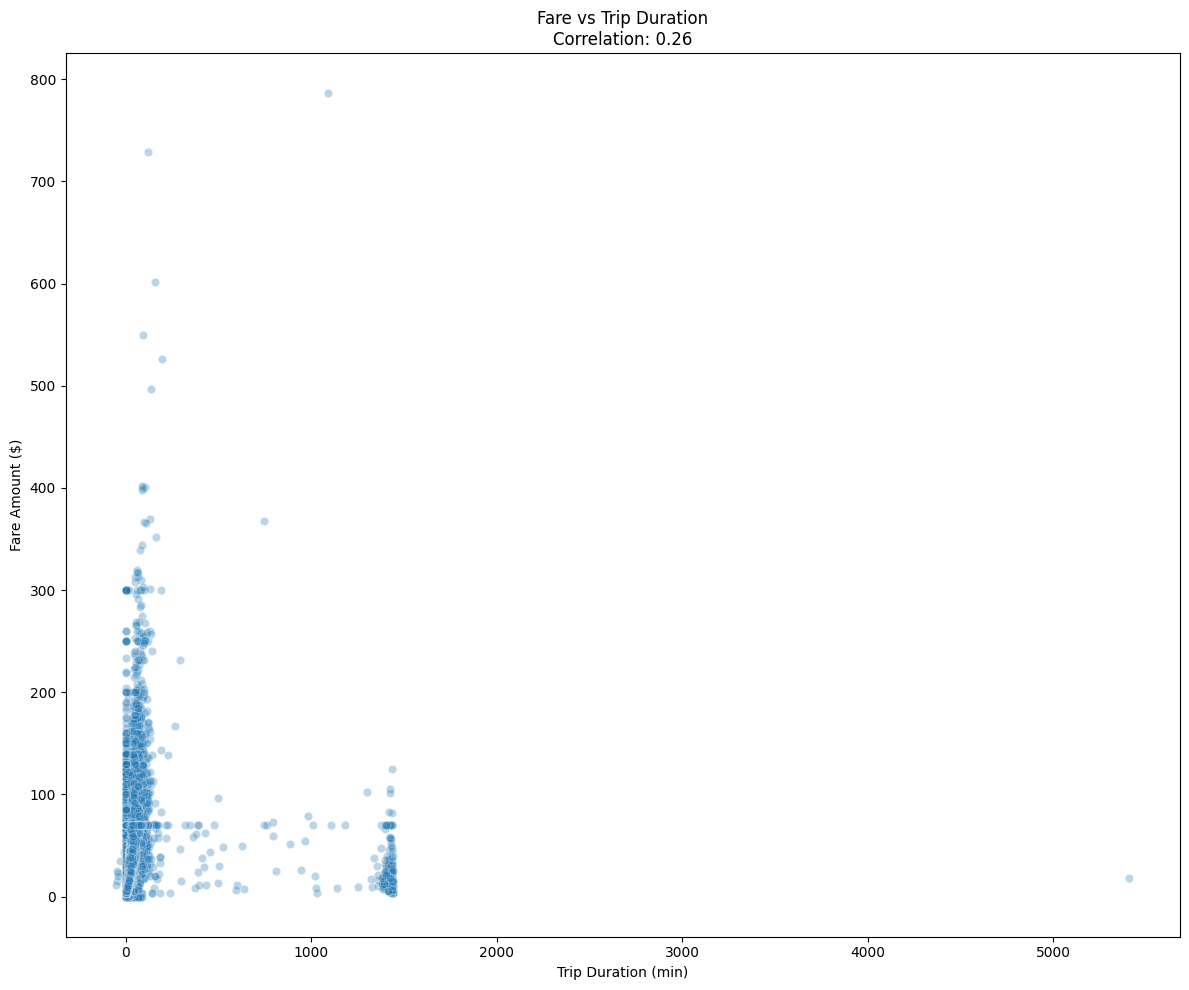

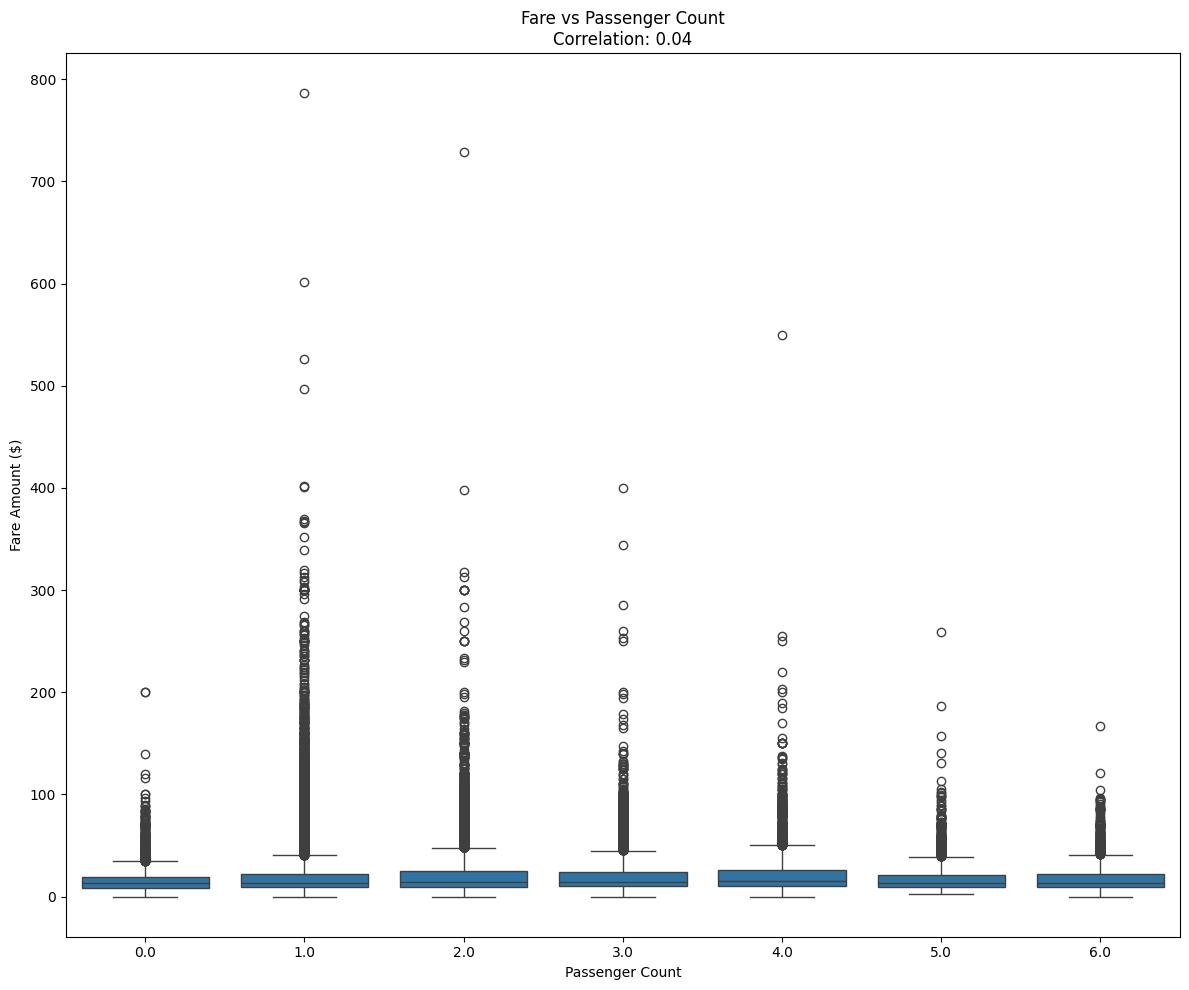

In [210]:
# Ensure datetime columns are in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Compute trip duration in minutes
df['trip_duration_min'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Drop rows with missing or invalid values for the relevant columns
df_corr = df.dropna(subset=['fare_amount', 'trip_duration_min', 'passenger_count', 'tip_amount', 'trip_distance'])

# Scatterplot 1: fare_amount vs trip_duration
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df_corr, x='trip_duration_min', y='fare_amount', alpha=0.3)
plt.title(f"Fare vs Trip Duration\nCorrelation: {df_corr['fare_amount'].corr(df_corr['trip_duration_min']):.2f}")
plt.xlabel("Trip Duration (min)")
plt.ylabel("Fare Amount ($)")
plt.tight_layout()
plt.show()

# Scatterplot 2: fare_amount vs passenger_count
plt.figure(figsize=(12, 10))
sns.boxplot(data=df_corr, x='passenger_count', y='fare_amount')
plt.title(f"Fare vs Passenger Count\nCorrelation: {df_corr['fare_amount'].corr(df_corr['passenger_count']):.2f}")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.tight_layout()
plt.show()

# Scatterplot 3: tip_amount vs trip_distance
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df_corr, x='trip_distance', y='tip_amount', alpha=0.3)
plt.title(f"Tip vs Trip Distance\nCorrelation: {df_corr['tip_amount'].corr(df_corr['trip_distance']):.2f}")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.tight_layout()
plt.show()

In [211]:
# Show relationship between fare and number of passengers
# Drop rows with missing or zero/negative fares or passengers
df_pass = df[(df['fare_amount'] > 0) & (df['passenger_count'] > 0)]

# Boxplot: Fare vs Passenger Count
plt.figure(figsize=(12, 10))
sns.boxplot(data=df_pass, x='passenger_count', y='fare_amount')
plt.title("Fare Amount vs Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.tight_layout()
plt.show()



In [212]:
# Show relationship between tip and trip distance
df_tips = df[(df['trip_distance'] > 0) & (df['tip_amount'] >= 0)]

# Scatterplot: Tip vs Trip Distance
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df_tips, x='trip_distance', y='tip_amount', alpha=0.3)
plt.title(f"Tip Amount vs Trip Distance\nCorrelation: {df_tips['tip_amount'].corr(df_tips['trip_distance']):.2f}")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.tight_layout()
plt.show()



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [214]:
# Analyse the distribution of different payment types (payment_type).

payment_counts = df['payment_type'].value_counts().sort_index()

# Mapping IDs to actual payment methods (as per NYC Taxi data dictionary)
payment_map = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}
df['payment_label'] = df['payment_type'].map(payment_map)

# Plot the distribution
plt.figure(figsize=(12, 10))
sns.countplot(data=df, x='payment_label', order=payment_map.values())
plt.title("Distribution of Payment Types")
plt.xlabel("Payment Type")
plt.ylabel("Number of Trips")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [222]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [224]:
 import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('/Users/sitoshnabhoi/Certifications/IIITB/EDA/Datasets and Dictionary/taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

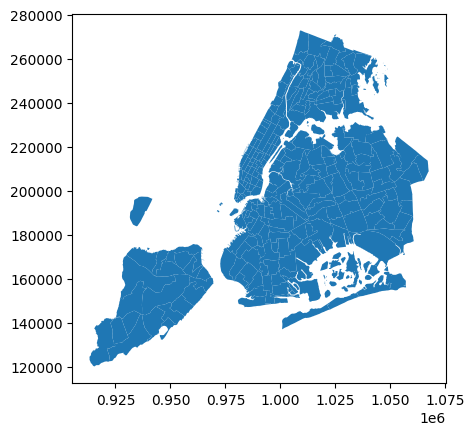

In [229]:
 print(zones.info())
 zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [233]:
# Merge zones and trip records using locationID and PULocationID
#  rename for clarity
zones = zones.rename(columns={'LocationID': 'PULocationID'})

# Merge on pickup location
df_merged = pd.merge(df, zones, on='PULocationID', how='left')

# Convert to GeoDataFrame for mapping
gdf_pickups = gpd.GeoDataFrame(df_merged, geometry='geometry', crs=zones.crs)

# Display sample merged data
print(gdf_pickups[['PULocationID', 'zone', 'borough', 'geometry']].head())


   PULocationID                           zone    borough  \
0           186   Penn Station/Madison Sq West  Manhattan   
1           237          Upper East Side South  Manhattan   
2           264                            NaN        NaN   
3            79                   East Village  Manhattan   
4           158  Meatpacking/West Village West  Manhattan   

                                            geometry  
0  POLYGON ((986752.603 210853.699, 986627.863 21...  
1  POLYGON ((993633.442 216961.016, 993507.232 21...  
2                                               None  
3  POLYGON ((988746.067 202151.955, 988733.885 20...  
4  POLYGON ((982091.02 209596.704, 982318.344 209...  


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [236]:
# Group data by location and calculate the number of trips
trip_counts_by_zone = df_merged.groupby('zone').size().reset_index(name='num_trips')

# Sort descending
trip_counts_by_zone = trip_counts_by_zone.sort_values(by='num_trips', ascending=False)

# Display top 10
print(trip_counts_by_zone.head(10))


                             zone  num_trips
113                   JFK Airport      15480
215         Upper East Side South      14079
144                Midtown Center      13842
214         Upper East Side North      12462
145                  Midtown East      10502
167  Penn Station/Madison Sq West      10224
122             LaGuardia Airport      10143
208     Times Sq/Theatre District       9972
126           Lincoln Square East       9843
153                   Murray Hill       8859


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [239]:
# Merge trip counts back to the zones GeoDataFrame

# STEP 1: Group trip data by pickup location ID
trip_counts = df.groupby('PULocationID').size().reset_index(name='num_trips')

# STEP 2: Load and prepare zones GeoDataFrame
zones = gpd.read_file('/Users/sitoshnabhoi/Certifications/IIITB/EDA/Datasets and Dictionary/taxi_zones/taxi_zones.shp')

# STEP 3: Merge trip counts back into the zones GeoDataFrame
zones = zones.merge(trip_counts, how='left', left_on='LocationID', right_on='PULocationID')

# STEP 4: Fill missing trip counts with 0
zones['num_trips'] = zones['num_trips'].fillna(0)


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [241]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it

zones.plot(column='num_trips', ax=ax, legend=True, cmap='viridis', edgecolor='black')
ax.set_title("Number of Taxi Pickups per Zone", fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()

In [243]:
# can you try displaying the zones DF sorted by the number of trips?

zones_sorted = zones.sort_values(by='num_trips', ascending=False)

# Display the top rows sorted by trip counts
print(zones_sorted[['num_trips']])

     num_trips
131    15480.0
236    14079.0
160    13842.0
235    12462.0
161    10502.0
..         ...
244        0.0
183        0.0
186        0.0
198        0.0
98         0.0

[263 rows x 1 columns]


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [253]:


# 1. Calculate trip duration in hours
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 3600

# 2. Filter out zero or small durations and distances
df_filtered = df[(df['trip_duration'] > 0.01) & (df['trip_distance'] > 0.1)]

# 3. Group by route and hour
grouped = df_filtered.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])

# 5. Aggregate mean trip distance and duration
route_speed = grouped.agg(
    avg_distance=('trip_distance', 'mean'),
    avg_duration=('trip_duration', 'mean'),
    trip_count=('trip_distance', 'count')
).reset_index()

# 6. Calculate speed
route_speed['speed'] = route_speed['avg_distance'] / route_speed['avg_duration']

# 7. Filter out NaN and inf speeds
route_speed = route_speed.replace([np.inf, -np.inf], np.nan).dropna(subset=['speed'])

# 8. Identify slowest routes
slowest_routes = route_speed.sort_values(by='speed').head(10)

print("Top 10 Slowest Routes by Hour:")
print(slowest_routes)


Top 10 Slowest Routes by Hour:
       PULocationID  DOLocationID  pickup_hour  avg_distance  avg_duration  \
47928           226           145           18         0.500     90.183333   
30636           142           142            5         0.560     23.559167   
2307             40            65           21         1.120     23.907222   
35675           158           114           16         1.360     23.930833   
38567           162           162            4         1.540     23.772778   
4145             45           249            3         1.580     23.868056   
19554           114           249            7         0.800     11.583194   
64979           264           168           23         1.360     19.001667   
13040            88           144            0         1.780     23.757778   
7301             68            68            2         1.065     11.826250   

       trip_count     speed  
47928           1  0.005544  
30636           1  0.023770  
2307            1  0

How does identifying high-traffic, high-demand routes help us?

Identifying high-traffic, high-demand routes in the context of NYC taxi data (or any other similar transportation data) provides valuable insights that can help optimize taxi operations, improve urban mobility, and deliver better services to customers.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Busiest Hour: 18:00 with 21224 trips


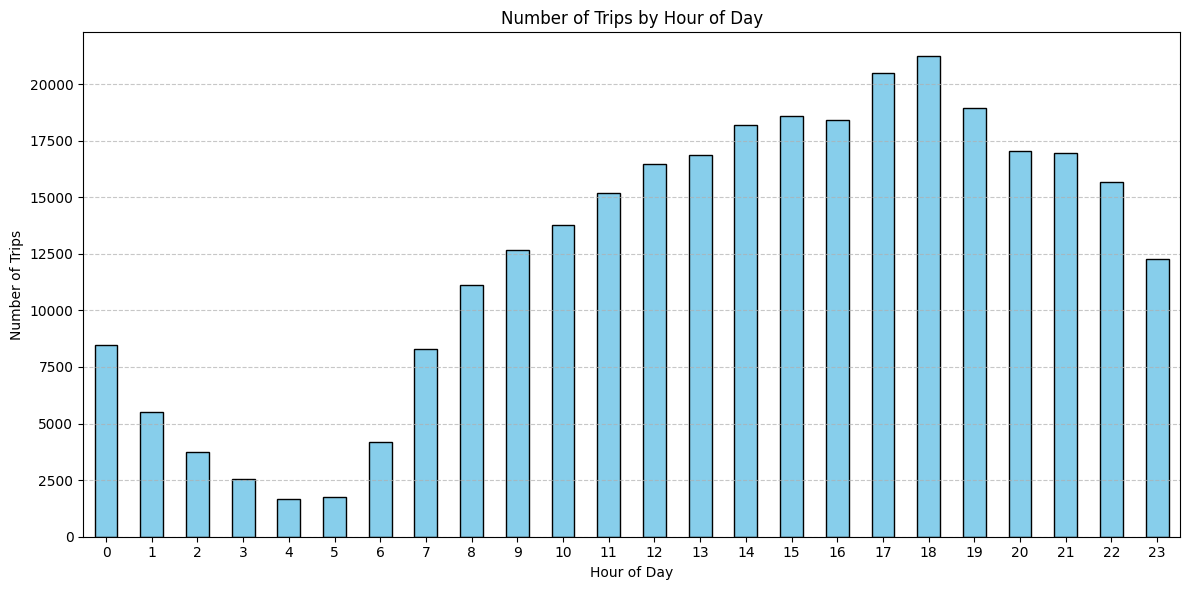

In [257]:
# Visualise the number of trips per hour and find the busiest hour

# Ensure datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract the hour of pickup
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Group by pickup hour and count trips
hourly_trip_counts = df['pickup_hour'].value_counts().sort_index()

# Find the busiest hour
busiest_hour = hourly_trip_counts.idxmax()
busiest_count = hourly_trip_counts.max()

# Print results
print(f"Busiest Hour: {busiest_hour}:00 with {busiest_count} trips")

# Plot the result
plt.figure(figsize=(12, 6))
hourly_trip_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [261]:



# Count the number of trips per hour
hourly_trip_counts = df['pickup_hour'].value_counts().sort_values(ascending=False)

# Get top 5 busiest hours
top_5_busiest = hourly_trip_counts.head(5).sort_index()  # Sort by hour for readability

# Display results
print("Top 5 Busiest Hours (Hour: Number of Trips):")
print(top_5_busiest)

Top 5 Busiest Hours (Hour: Number of Trips):
pickup_hour
15    18569
16    18428
17    20484
18    21224
19    18924
Name: count, dtype: int64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [264]:
df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-02-14 09:34:34   2023-02-14 09:52:19              1.0   
1              2  2023-05-11 16:34:31   2023-05-11 16:56:14              1.0   
2              2  2023-06-04 00:37:44   2023-06-04 00:45:30              1.0   
3              2  2023-06-15 02:45:01   2023-06-15 02:52:01              1.0   
4              2  2023-03-01 20:55:34   2023-03-01 21:09:09              1.0   
...          ...                  ...                   ...              ...   
299995         2  2023-04-29 15:23:27   2023-04-29 15:23:33              1.0   
299996         2  2023-01-30 17:28:26   2023-01-30 17:37:40              1.0   
299997         2  2023-12-28 15:10:27   2023-12-28 15:21:36              1.0   
299998         2  2023-10-23 10:42:26   2023-10-23 10:51:32              1.0   
299999         2  2023-01-27 21:55:02   2023-01-27 22:09:41              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                1.11         1.0           186           230             1   
1                2.43         1.0           237           234             1   
2                0.88         1.0           264           264             2   
3                1.09         1.0            79           211             1   
4                1.94         1.0           158           144             1   
...               ...         ...           ...           ...           ...   
299995           0.00         5.0           170           170             1   
299996           0.97         1.0            41            74             2   
299997           0.95         1.0            43            43             1   
299998           0.88         1.0           170           233             1   
299999           2.01         1.0           249           261             1   

        fare_amount  ...  pickup_day  pickup_day_name  pickup_month  \
0             15.60  ...           1              Tue             2   
1             19.80  ...           3              Thu             5   
2              8.60  ...           6              Sun             6   
3              9.30  ...           3              Thu             6   
4             13.32  ...           2              Wed             3   
...             ...  ...         ...              ...           ...   
299995        85.00  ...           5              Sat             4   
299996        10.00  ...           0              Mon             1   
299997        11.40  ...           3              Thu            12   
299998         9.30  ...           0              Mon            10   
299999        14.90  ...           4              Fri             1   

        pickup_month_name  month  month_name  quarter  trip_duration_min  \
0                     Feb      2         Feb   2023Q1          17.750000   
1                     May      5         May   2023Q2          21.716667   
2                     Jun      6         Jun   2023Q2           7.766667   
3                     Jun      6         Jun   2023Q2           7.000000   
4                     Mar      3         Mar   2023Q1          13.583333   
...                   ...    ...         ...      ...                ...   
299995                Apr      4         Apr   2023Q2           0.100000   
299996                Jan      1         Jan   2023Q1           9.233333   
299997                Dec     12         Dec   2023Q4          11.150000   
299998                Oct     10         Oct   2023Q4           9.100000   
299999                Jan      1         Jan   2023Q1          14.650000   

        payment_label  trip_duration  
0         Credit Card       0.295833  
1         Credit Card       0.361944  
2                Cash       0.129444  
3         Credit Card       0.116667  
4         Credit Card       0.226389  
...               ...            ...  
299995    Credit Card       0.001667  
299996           Cas

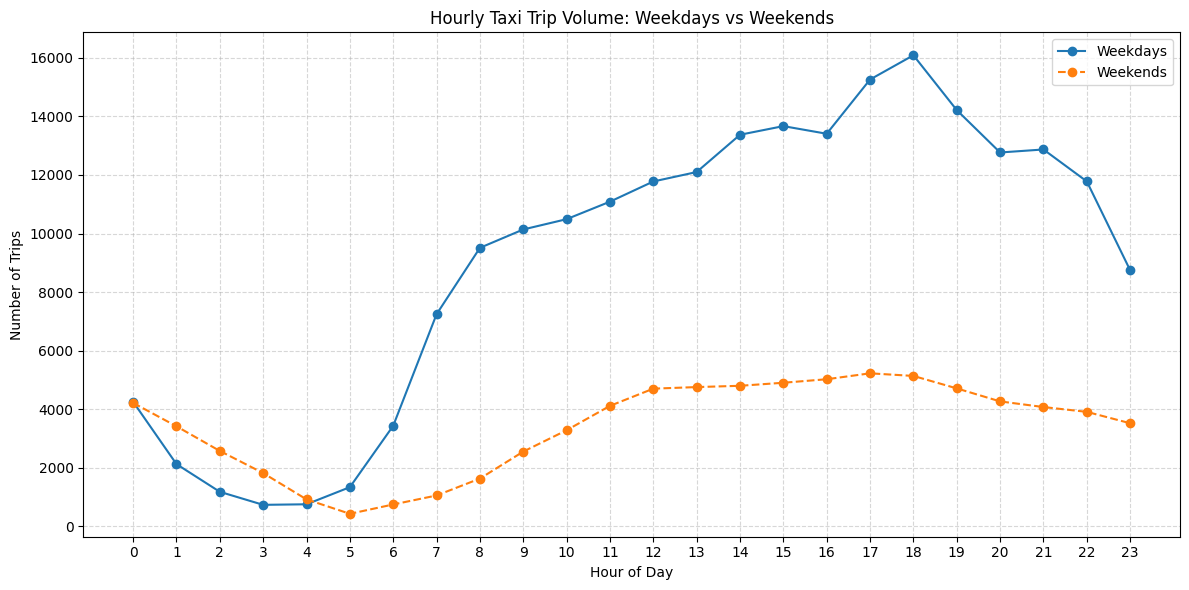

In [265]:
# Compare traffic trends for the week days and weekends
# Split into weekdays and weekends
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
weekday_df = df[df['day_of_week'] < 5]
weekend_df = df[df['day_of_week'] >= 5]

# Group by hour and count trips
weekday_hourly = weekday_df['pickup_hour'].value_counts().sort_index()
weekend_hourly = weekend_df['pickup_hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(weekday_hourly.index, weekday_hourly.values, label='Weekdays', marker='o')
plt.plot(weekend_hourly.index, weekend_hourly.values, label='Weekends', marker='o', linestyle='--')
plt.title('Hourly Taxi Trip Volume: Weekdays vs Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?
Insights from Traffic Patterns
Weekdays:
Morning peak around 8–10 AM and evening peak around 5–7 PM.

Late night hours (midnight–5 AM) show relatively low activity.

Weekends:
Later start to the day; trip volume picks up from 10 AM onward.

Peak often occurs in the afternoon (12–5 PM) and sometimes again around evening/night (7–10 PM)

Early mornings are quieter than weekday

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

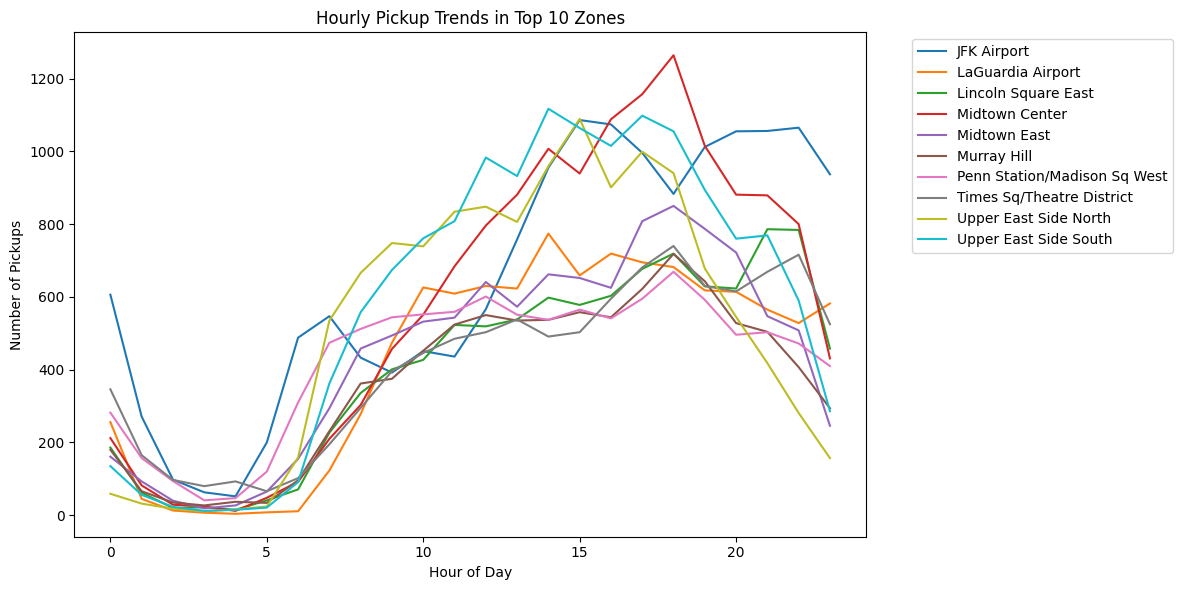

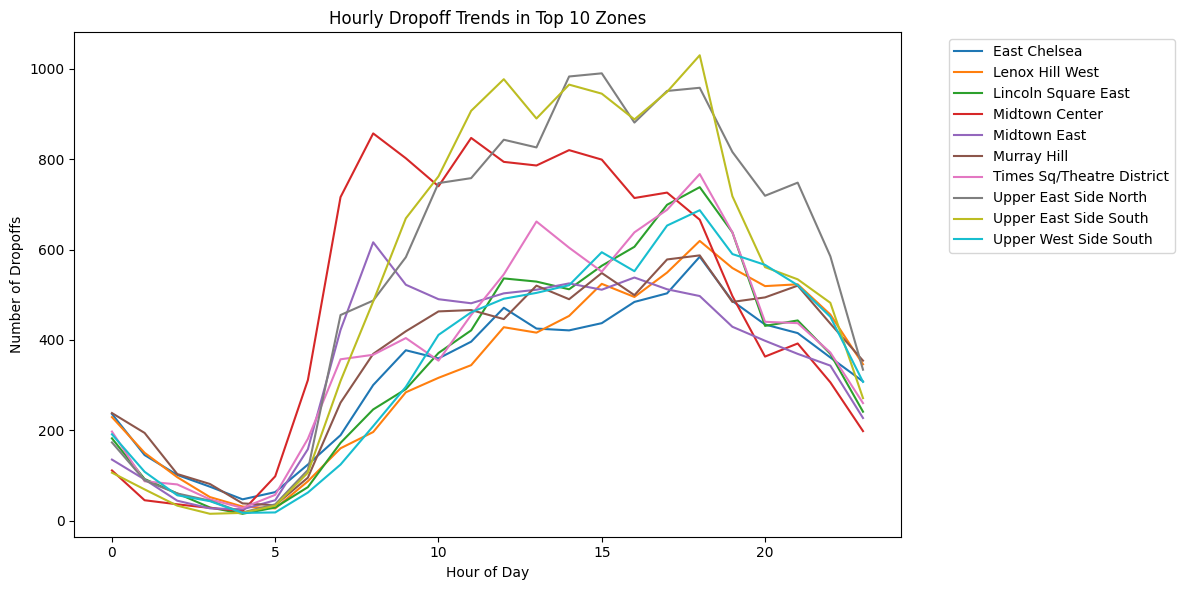

In [270]:
# Find top 10 pickup and dropoff zones

# Count pickups by zone and hour
pickup_counts = df.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='pickup_count')

# Count dropoffs by zone and hour
dropoff_counts = df.groupby(['DOLocationID', 'pickup_hour']).size().reset_index(name='dropoff_count')
#2. Get Top 10 Zones for Pickups and Dropoffs
total_pickups_by_zone = pickup_counts.groupby('PULocationID')['pickup_count'].sum().sort_values(ascending=False)
top_10_pickup_zones = total_pickups_by_zone.head(10).index

# Total dropoffs by zone
total_dropoffs_by_zone = dropoff_counts.groupby('DOLocationID')['dropoff_count'].sum().sort_values(ascending=False)
top_10_dropoff_zones = total_dropoffs_by_zone.head(10).index

#3 Filter Hourly Data for These Zones
pickup_trend_top10 = pickup_counts[pickup_counts['PULocationID'].isin(top_10_pickup_zones)]
dropoff_trend_top10 = dropoff_counts[dropoff_counts['DOLocationID'].isin(top_10_dropoff_zones)]

#4Merge with Zone Names (if available)
pickup_trend_top10 = pickup_trend_top10.merge(zones, left_on='PULocationID', right_on='LocationID')
dropoff_trend_top10 = dropoff_trend_top10.merge(zones, left_on='DOLocationID', right_on='LocationID')

#5 Plot Pickup Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=pickup_trend_top10, x='pickup_hour', y='pickup_count', hue='zone')
plt.title('Hourly Pickup Trends in Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot Dropoff Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=dropoff_trend_top10, x='pickup_hour', y='dropoff_count', hue='zone')
plt.title('Hourly Dropoff Trends in Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Dropoffs')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [272]:
# 1. Calculate Total Pickups and Dropoffs by Zone
pickup_counts = df['PULocationID'].value_counts().rename_axis('LocationID').reset_index(name='pickup_count')
dropoff_counts = df['DOLocationID'].value_counts().rename_axis('LocationID').reset_index(name='dropoff_count')
zone_stats = pd.merge(pickup_counts, dropoff_counts, on='LocationID', how='outer').fillna(0)

# 2. Calculate Pickup/Dropoff Ratio
zone_stats['pickup_dropoff_ratio'] = zone_stats['pickup_count'] / zone_stats['dropoff_count'].replace(0, np.nan)
zone_stats = zone_stats.dropna(subset=['pickup_dropoff_ratio'])

#3. Merge with Zone Names
zone_stats = zone_stats.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')

# 4. Display Top 10 and Bottom 10 Zones by Ratio
top10_ratio = zone_stats.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
bottom10_ratio = zone_stats.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)

print("Top 10 Pickup/Dropoff Ratios:")
print(top10_ratio[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

print(" Bottom 10 Pickup/Dropoff Ratios:")
print(bottom10_ratio[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

Top 10 Pickup/Dropoff Ratios:
                             zone  pickup_count  dropoff_count  \
70                  East Elmhurst        1339.0          153.0   
127                   JFK Airport       15480.0         3679.0   
133             LaGuardia Airport       10143.0         3999.0   
181  Penn Station/Madison Sq West       10224.0         6577.0   
109       Greenwich Village South        4103.0         2866.0   
42                   Central Park        4954.0         3542.0   
243                  West Village        6558.0         5021.0   
157                  Midtown East       10502.0         8419.0   
158                 Midtown North        8806.0         7180.0   
99               Garment District        4908.0         4079.0   

     pickup_dropoff_ratio  
70               8.751634  
127              4.207665  
133              2.536384  
181              1.554508  
109              1.431612  
42               1.398645  
243              1.306114  
157              1.

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [276]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones

# 1. Filter for Night Hours (11 PM to 5 AM)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
night_df = df[df['pickup_hour'].isin([23, 0, 1, 2, 3, 4, 5])]

# 2. Count Pickups and Dropoffs by Zone
night_pickups = night_df['PULocationID'].value_counts().rename_axis('LocationID').reset_index(name='night_pickup_count')
night_dropoffs = night_df['DOLocationID'].value_counts().rename_axis('LocationID').reset_index(name='night_dropoff_count')
night_stats = pd.merge(night_pickups, night_dropoffs, on='LocationID', how='outer').fillna(0)
night_stats = night_stats.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')

# 3. Identify Top Zones
top_night_pickups = night_stats.sort_values(by='night_pickup_count', ascending=False).head(10)
top_night_dropoffs = night_stats.sort_values(by='night_dropoff_count', ascending=False).head(10)

print("Top 10 Pickup Zones During Night Hours:")
print(top_night_pickups[['zone', 'night_pickup_count']])

print(" Top 10 Dropoff Zones During Night Hours:")
print(top_night_dropoffs[['zone', 'night_dropoff_count']])

Top 10 Pickup Zones During Night Hours:
                             zone  night_pickup_count
75                   East Village              2553.0
123                   JFK Airport              2227.0
234                  West Village              2049.0
45                   Clinton East              1673.0
139               Lower East Side              1555.0
105       Greenwich Village South              1511.0
217     Times Sq/Theatre District              1372.0
175  Penn Station/Madison Sq West              1151.0
64                   East Chelsea              1038.0
155                 Midtown South              1034.0
 Top 10 Dropoff Zones During Night Hours:
                          zone  night_dropoff_count
75                East Village               1391.0
45                Clinton East               1137.0
161                Murray Hill               1042.0
99                    Gramercy                984.0
64                East Chelsea                975.0
132         

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

💰 Revenue Share by Time of Day:
time_of_day
Day      0.878573
Night    0.121427
Name: total_amount, dtype: float64


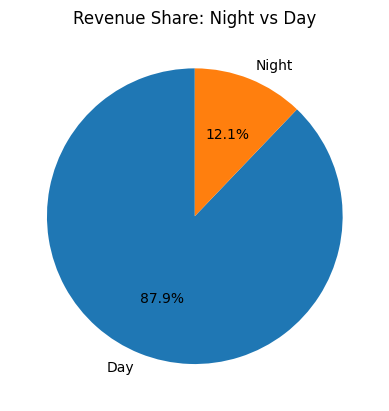

In [279]:
#1 Extract Hour and Categorize Time of Day
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
def categorize_time(hour):
    if hour in [23, 0, 1, 2, 3, 4, 5]:
        return 'Night'
    else:
        return 'Day'

df['time_of_day'] = df['pickup_hour'].apply(categorize_time)
# 2. Calculate Revenue for Each Time of Day
revenue_by_time = df.groupby('time_of_day')['total_amount'].sum()
revenue_share = revenue_by_time / revenue_by_time.sum()
print("💰 Revenue Share by Time of Day:")
print(revenue_share)
#3 Optional: Pie Chart for Visualisation
revenue_share.plot.pie(autopct='%1.1f%%', startangle=90, title='Revenue Share: Night vs Day')
plt.ylabel('')
plt.show()


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [283]:
# Analyse the fare per mile per passenger for different passenger counts
df_cleaned = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)].copy()

# Recalculate
df_cleaned['fare_per_mile'] = df_cleaned['fare_amount'] / df_cleaned['trip_distance']
df_cleaned['fare_per_mile_per_passenger'] = df_cleaned['fare_per_mile'] / df_cleaned['passenger_count']

# Group by passenger count
fare_per_passenger = df_cleaned.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
fare_per_passenger.columns = ['Passenger Count', 'Avg. Fare per Mile per Passenger (USD)']
fare_per_passenger.sort_values(by='Passenger Count', inplace=True)

fare_per_passenger

Passenger Count  Avg. Fare per Mile per Passenger (USD)
0              1.0                               10.986175
1              2.0                                6.110625
2              3.0                                4.014715
3              4.0                                4.319697
4              5.0                                1.767913
5              6.0                                1.324667

passenger_count
1.0    7.910419
2.0    3.931375
3.0    2.615001
4.0    1.965862
5.0    1.529453
6.0    1.311309
Name: fare_per_mile_per_passenger, dtype: float64


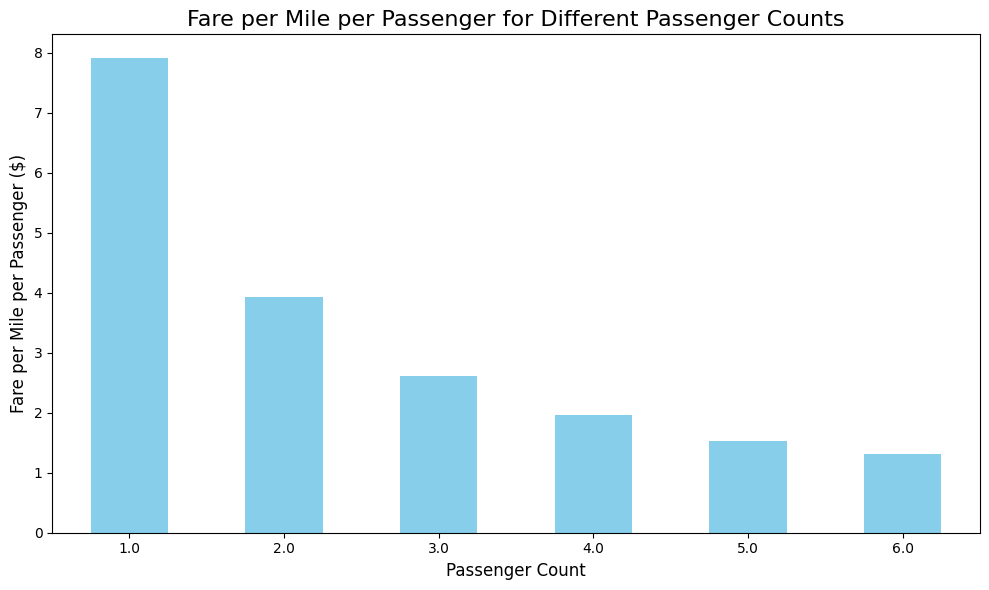

In [285]:
# Remove rows with zero or very small trip distances (e.g., less than 0.1 miles)
df_cleaned = df[df['trip_distance'] > 0.1]

# Ensure passenger_count is greater than zero
df_cleaned = df_cleaned[df_cleaned['passenger_count'] > 0]

# Recalculate fare per mile per passenger after cleaning
df_cleaned['fare_per_mile'] = df_cleaned['fare_amount'] / df_cleaned['trip_distance']
df_cleaned['fare_per_mile_per_passenger'] = df_cleaned['fare_per_mile'] / df_cleaned['passenger_count']

# Group by passenger count and calculate the mean fare per mile per passenger
fare_per_mile_per_passenger_by_count = df_cleaned.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()

# Display the results
print(fare_per_mile_per_passenger_by_count)

# Plot the relationship between passenger count and fare per mile per passenger
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
fare_per_mile_per_passenger_by_count.plot(kind='bar', color='skyblue')
plt.title('Fare per Mile per Passenger for Different Passenger Counts', fontsize=16)
plt.xlabel('Passenger Count', fontsize=12)
plt.ylabel('Fare per Mile per Passenger ($)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

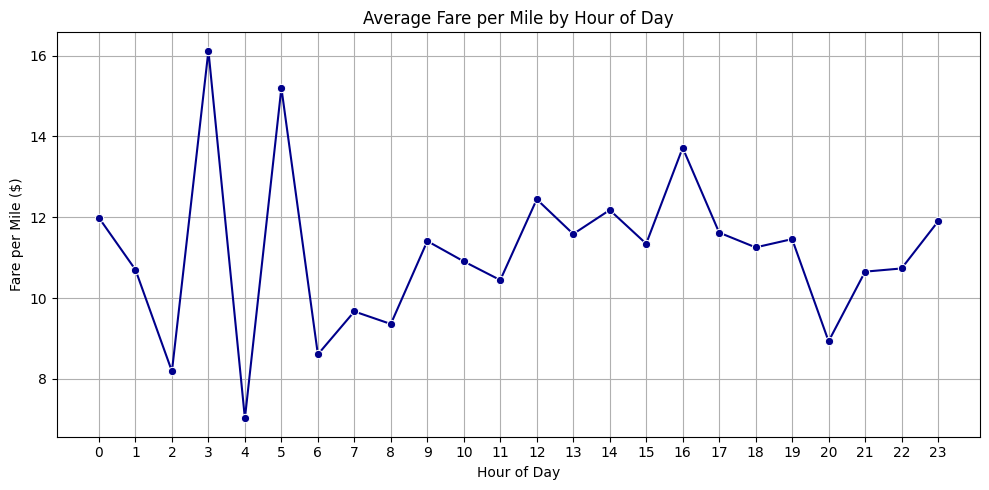

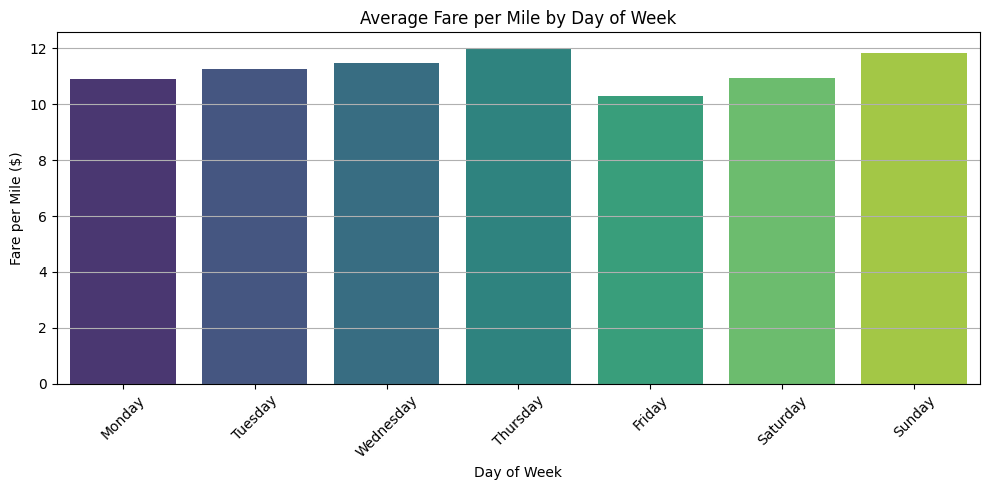

In [288]:
df['fare_amount'] = pd.to_numeric(df['fare_amount'], errors='coerce')
df['trip_distance'] = pd.to_numeric(df['trip_distance'], errors='coerce')
df = df[df['trip_distance'] > 0]
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
fare_by_hour = df.groupby('hour')['fare_per_mile'].mean().reset_index()
fare_by_hour.head()

# Group by day
from pandas.api.types import CategoricalDtype

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=day_order, ordered=True)
df['day_of_week'] = df['day_of_week'].astype(cat_type)

fare_by_day = df.groupby('day_of_week')['fare_per_mile'].mean().reset_index()


heatmap_data = df.groupby(['day_of_week', 'hour'])['fare_per_mile'].mean().unstack()

# Average Fare per Mile by Hour of Day
plt.figure(figsize=(10, 5))
sns.lineplot(data=fare_by_hour, x='hour', y='fare_per_mile', marker='o', color='darkblue')
plt.title('Average Fare per Mile by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per Mile ($)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

#Average Fare per Mile by Day of Week
plt.figure(figsize=(10, 5))
sns.barplot(data=fare_by_day, x='day_of_week', y='fare_per_mile', palette='viridis')
plt.title('Average Fare per Mile by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Fare per Mile ($)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [291]:
# Compare fare per mile for different vendors

# Filter out records with non-positive trip distances
df_valid = df[df['trip_distance'] > 0].copy()

# Calculate fare per mile
df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']

# Extract hour from pickup datetime
df_valid['hour'] = df_valid['tpep_pickup_datetime'].dt.hour

avg_fare_per_mile_vendor_hour = df_valid.groupby(['VendorID', 'hour'])['fare_per_mile'].mean().reset_index()

avg_fare_per_mile_vendor_hour.plot(figsize=(12, 6), marker='o')
plt.title("Average Fare per Mile by Vendor by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Fare per Mile")
plt.legend(title='VendorID')
plt.grid(True)
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers
def get_distance_tier(distance):
    if distance <= 2:
        return '0-2 miles'
    elif distance <= 5:
        return '2-5 miles'
    else:
        return '>5 miles'
df_valid = df[df['trip_distance'] > 0].copy()

# Calculate fare per mile
df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']

df_valid['distance_tier'] = df_valid['trip_distance'].apply(get_distance_tier)
tiered_fare = df_valid.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()
print(tiered_fare)

tiered_fare.plot(kind='bar', figsize=(10, 6))
plt.title('Average Fare per Mile by Vendor across Distance Tiers')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile')
plt.legend(title='VendorID')
plt.grid(True)
plt.tight_layout()
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['fare_amount'] = pd.to_numeric(df['fare_amount'], errors='coerce')
df['tip_amount'] = pd.to_numeric(df['tip_amount'], errors='coerce')

# Filter valid rows
df = df[(df['fare_amount'] > 0) & (df['tip_amount'] >= 0)]

# Calculate tip percentage
df['tip_percent'] = (df['tip_amount'] / df['fare_amount']) * 100

# Bin trip distances
df['trip_bin'] = pd.cut(df['trip_distance'], 
                        bins=[0, 1, 2, 5, 10, 20, np.inf], 
                        labels=['0-1 mi', '1-2 mi', '2-5 mi', '5-10 mi', '10-20 mi', '20+ mi'])

# Extract pickup hour
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Set plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Plot 1: Tip % by Trip Distance
sns.barplot(x='trip_bin', y='tip_percent', data=df, estimator='mean', ci=None, ax=axes[0], palette='Blues_d')
axes[0].set_title("Average Tip Percentage by Trip Distance", fontsize=16)
axes[0].set_xlabel("Trip Distance (miles)", fontsize=12)
axes[0].set_ylabel("Average Tip %", fontsize=12)

# Plot 2: Tip % by Passenger Count
sns.barplot(x='passenger_count', y='tip_percent', data=df, estimator='mean', ci=None, ax=axes[1], palette='Greens_d')
axes[1].set_title("Average Tip Percentage by Passenger Count", fontsize=16)
axes[1].set_xlabel("Passenger Count", fontsize=12)
axes[1].set_ylabel("Average Tip %", fontsize=12)

# Plot 3: Tip % by Pickup Hour
sns.barplot(x='pickup_hour', y='tip_percent', data=df, estimator='mean', ci=None, ax=axes[2], palette='Oranges_d')
axes[2].set_title("Average Tip Percentage by Pickup Hour", fontsize=16)
axes[2].set_xlabel("Pickup Hour (24h format)", fontsize=12)
axes[2].set_ylabel("Average Tip %", fontsize=12)

# Final layout tweaks
plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Filter low and high tip groups
low_tip_df = df[df['tip_percent'] < 10]
high_tip_df = df[df['tip_percent'] > 25]

# Compare average stats
comparison = {
    'Average Fare Amount': [low_tip_df['fare_amount'].mean(), high_tip_df['fare_amount'].mean()],
    'Average Tip Amount': [low_tip_df['tip_amount'].mean(), high_tip_df['tip_amount'].mean()],
    'Average Trip Distance': [low_tip_df['trip_distance'].mean(), high_tip_df['trip_distance'].mean()],
    'Average Passenger Count': [low_tip_df['passenger_count'].mean(), high_tip_df['passenger_count'].mean()],
    'Average Pickup Hour': [low_tip_df['tpep_pickup_datetime'].dt.hour.mean(), high_tip_df['tpep_pickup_datetime'].dt.hour.mean()]
}

# Display as DataFrame
comparison_df = pd.DataFrame(comparison, index=['Tip < 10%', 'Tip > 25%'])
comparison_df


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()

passenger_heatmap = df.groupby(['pickup_day', 'pickup_hour'])['passenger_count'].mean().unstack()

# Reorder days to start with Monday
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
passenger_heatmap = passenger_heatmap.reindex(ordered_days)

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(passenger_heatmap, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Average Passenger Count by Hour and Day of Week")
plt.xlabel("Pickup Hour")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
df_merged.info()

In [ ]:
# How does passenger count vary across zones
zone_passenger_counts = df_merged.groupby('zone')['passenger_count'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
top_zones = zone_passenger_counts.head(20)  # top 20 zones
sns.barplot(x=top_zones.values, y=top_zones.index, palette='viridis')
plt.title('Top 20 NYC Zones by Total Passenger Count')
plt.xlabel('Total Passengers')
plt.ylabel('Zone')
plt.tight_layout()
plt.show()

In [ ]:
df.columns

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
trips_summary = df.groupby('PULocationID').agg(
    passenger_count=('passenger_count', 'sum'),
    trip_count=('passenger_count', 'count')  # or count a trip_id column
).reset_index()

zones_with_trips = zones.merge(
    trips_summary,
    left_on='LocationID',
    right_on='PULocationID',
    how='left'
)

zones_with_trips[['passenger_count', 'trip_count']] = zones_with_trips[['passenger_count', 'trip_count']].fillna(0)
zones_with_trips['avg_passenger_count'] = (
    zones_with_trips['passenger_count'] / zones_with_trips['trip_count']
).replace([float('inf'), -float('inf')], 0).round(2)
zones_with_trips.plot(
    column='avg_passenger_count',       # Column to visualize
    cmap='OrRd',                        # Color map (Orange-Red)
    legend=True,                        # Show color bar legend
    edgecolor='black',                  # Black border for zones
    linewidth=0.3                       # Thin border
)

# Add plot title and remove axes
plt.title('Average Passenger Count per Trip by NYC Taxi Zone', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?
df['extra'].value_counts().sort_index()
df['has_extra'] = df['extra'] > 0
extra_freq = df['has_extra'].value_counts(normalize=True) * 100
surcharge_breakdown = df['extra'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 6))
sns.barplot(
    x=surcharge_breakdown.index.astype(str), 
    y=surcharge_breakdown.values,
    palette="mako"
)
plt.title("Distribution of Extra Charges in NYC Taxi Trips")
plt.xlabel("Extra Charge ($)")
plt.xticks(rotation = 50)
plt.ylabel("Percentage of Trips")
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
Here are key, actionable recommendations for optimizing taxi routing and dispatching:

1. Demand-Driven Dynamic Dispatching
Recommendation: Use real-time and historical trip data to identify high-demand zones (e.g., Midtown, airports) by hour and day.

Benefit: Allocates idle taxis to zones where demand is expected to spike (e.g., rush hour, event venues).

2. Zone-Based Vehicle Balancing
Recommendation: Detect under- and over-supplied zones by comparing taxi availability vs. actual trip volume.

Benefit: Reduces wait times in high-demand areas and avoids idle taxis in low-demand zones.

3. Geo-Fencing for Efficient Routing
Recommendation: Create dynamic “geo-fenced” regions during peak hours to manage routing (e.g., limit access to Times Square at certain hours).

Benefit: Minimizes congestion and improves travel time reliability in bottleneck zones.

4. Cluster-Based Routing for Group Trips
Recommendation: Promote and route shared trips (e.g., Uber Pool-style) in high-density pickup zones with similar destinations.

Benefit: Increases passenger count per trip and reduces total vehicle miles traveled.

5. Optimize Airport and Event Dispatching
Recommendation: Implement queue management and predictive dispatch at high-volume hubs like JFK, LaGuardia, and stadiums.

Benefit: Streamlines pickups, reduces idle wait time, and improves throughp

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
Zonal heatmaps should be used to determine cab saturation levels and redistribute accordingly.

Station cabs proactively near transport hubs (airports, railway stations) during early mornings and late evenings when demand spikes.

Rotate cab presence across zones on weekends to meet leisure-based demand (e.g., parks, malls, cinemas).

Night-hour deployment should focus on hotspots like nightlife districts with increased demand and safety considerations.

Seasonal planning: Adjust cab deployment during tourist season or festivals by increasing presence in sightseeing and shopping areas.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
Surge pricing should be dynamically linked to demand-supply gaps in real-time, with thresholds defined by historical booking data.

Zone-based pricing: Introduce flexible rates based on zone popularity and traffic patterns to balance demand.

Off-peak discounts: Offer reduced fares in low-demand periods to stimulate usage and maintain driver earnings.

Competitor benchmarking: Regularly analyze competitor pricing to ensure competitive yet profitable rates.

Subscription plans: Develop loyalty or subscription models for frequent users, particularly for daily commuters.

Final Note: A demand-responsive and data-driven operational model that considers spatial-temporal patterns is crucial for optimizing customer satisfaction, increasing revenue, and reducing idle time. Strategic dispatching, smart cab 
positioning, and adaptive pricing are key pillars of an efficient and competitive cab service.